In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

1. Создайте объект Series, значениями которого являются целые числа от 1 до 5, а
индексами символы 'a', 'b', 'c', 'd', 'e'

In [3]:
num1 = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5})
print(num1)

a    1
b    2
c    3
d    4
e    5
dtype: int64


1. С помощью обращения по явному индексу получите значение 4

In [4]:
print(num1['d'])

4


2. С помощью обращения по неявному индексу получите значение 2.

In [5]:
print(num1[1])

2


3. Добавьте в серию новый элемент.

In [6]:
num1['f'] = 6
print(num1)

a    1
b    2
c    3
d    4
e    5
f    6
dtype: int64


4. Используя операцию среза, получите значения 3, 4, 5.

In [7]:
print(num1[2:5])

c    3
d    4
e    5
dtype: int64


5. Создайте объект DataFrame из списка [[1, 2], [5, 3], [3.7, 4.8]] с именами столбцов
col1 и col2.

In [8]:
df = pd.DataFrame(data=[[1, 2], [5, 3], [3.7, 4.8]], columns=['col1', 'col2'])
print(df)

   col1  col2
0   1.0   2.0
1   5.0   3.0
2   3.7   4.8


6. Используя операцию индексации, получите элемент 3.7

In [9]:
print(df["col1"][2])

3.7


7. Измените элемент 3 на 9

In [10]:
df["col2"][1]=9
print(df)

   col1  col2
0   1.0   2.0
1   5.0   9.0
2   3.7   4.8


8. Используя операцию среза, получите строки с индексами 1 и 2

In [11]:
print(df[1:3])

   col1  col2
1   5.0   9.0
2   3.7   4.8


9. Добавьте столбец col3, значения которого – результат поэлементного
перемножения col1 и col2.

In [12]:
df['col3']=df['col1']*df['col2']
print(df)

   col1  col2   col3
0   1.0   2.0   2.00
1   5.0   9.0  45.00
2   3.7   4.8  17.76


№2 (4 балла)
Дан список списков data.

На первом месте указывается имя героя на русском (ru_name), затем имя на английском
(en_name), вид героя (class) и индекс веселости, который измеряется в «Дейлах» (cheer).


In [13]:
data = [["Вжик", "Zipper the Fly", "fly", "0.7"],
["Гайка", "Gadget Hackwrench", "mouse", None],
["Дейл", "Dale", "chipmunk", "1"],
["Рокфор", "Monterey Jack", "mouse", "0.8"],
["Чип", "Chip", "chipmunk", "0.2"]]

1. На основе этого списка создайте датафрейм df так, чтобы каждому показателю
(ru_name, en_name, class, cheer) соответствовал один столбец датафрейма.
Проверьте, что последний столбец является числовым. Если нет, приведите его к
типу float.

In [14]:
df = pd.DataFrame(data)
df.columns = ["ru_name","eng_name","calss","cheer"]
df["cheer"] = pd.to_numeric(df["cheer"])
print(df)
print(df.info())

  ru_name           eng_name     calss  cheer
0    Вжик     Zipper the Fly       fly    0.7
1   Гайка  Gadget Hackwrench     mouse    NaN
2    Дейл               Dale  chipmunk    1.0
3  Рокфор      Monterey Jack     mouse    0.8
4     Чип               Chip  chipmunk    0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ru_name   5 non-null      object 
 1   eng_name  5 non-null      object 
 2   calss     5 non-null      object 
 3   cheer     4 non-null      float64
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes
None


2. Выведите число строк датафрейма df

In [15]:
print(df.shape[0])
print(len(df.index))

5
5


3. Выведите число заполненных (не NaN) ячеек в последнем столбце

In [16]:
print(df["cheer"].notnull().sum())

4


4. Выведите значение в ячейке, которая находится на пересечении третьей строки и
второго столбца.


In [17]:
df["eng_name"][3]

'Monterey Jack'

5. Сохраните в переменную df1 строки датафрейма df со второй по четвертую
включительно и столбцы с первого по третий включительно. Продемонстрируйте
содержимое df1.


In [18]:
df1 = pd.DataFrame()
for i in df.columns[1:4]:
    df1[i] = df[i][2:5]
df1

,eng_name,calss,cheer
2,Dale,chipmunk,1.0
3,Monterey Jack,mouse,0.8
4,Chip,chipmunk,0.2


6. Присвойте столбцам датафрейма df следующие названия: ru_name, en_name, class,
cheer.

In [19]:
df.columns = ["ru_name","eng_name","calss","cheer"]
#ещё при создании сделал
df

,ru_name,eng_name,calss,cheer
0,Вжик,Zipper the Fly,fly,0.7
1,Гайка,Gadget Hackwrench,mouse,NaN
2,Дейл,Dale,chipmunk,1.0
3,Рокфор,Monterey Jack,mouse,0.8
4,Чип,Chip,chipmunk,0.2


7. Добавьте в датафрейм df столбец logcheer, который содержит логарифмированные
значения cheer (если в cheer встречается NaN, то и в logcheer тоже).

In [20]:
df["logcheer"] = np.log10(df["cheer"])
df

,ru_name,eng_name,calss,cheer,logcheer
0,Вжик,Zipper the Fly,fly,0.7,-0.154902
1,Гайка,Gadget Hackwrench,mouse,NaN,NaN
2,Дейл,Dale,chipmunk,1.0,0.000000
3,Рокфор,Monterey Jack,mouse,0.8,-0.096910
4,Чип,Chip,chipmunk,0.2,-0.698970


8. Сохраните массив уникальных значений столбца class в переменную x, а
соответствующие им частоты (сколько раз значение встречается в столбце) — в
переменную y. Используя полученные x и y, постройте столбиковую диаграмму,
barplot, для class. Добавьте заголовок и подписи к осям.

Text(0, 0.5, 'calss')

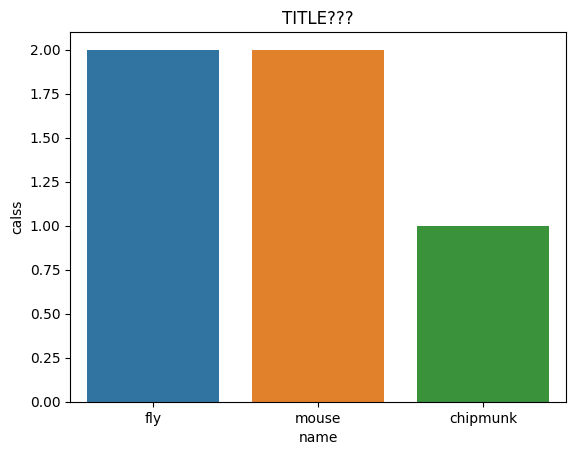

In [21]:
x = df["calss"].unique()
y = df["calss"].value_counts()

h = sb.barplot(x=x, y=y)
h.set_title('TITLE???')
h.set_xlabel('name')
h.set_ylabel('calss')

1. Загрузите случайную выборку из этого набора и далее работайте с ней:

In [22]:
file = "la-crimes-sample.csv"
df = pd.read_csv(file)
df

,Unnamed: 0,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,246798,100509940,2010-04-25,2010-04-25,1630,5,Harbor,529,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,740.0,NaN,NaN,NaN,CAL YACHT,MARINA SLIP D17,"(33.7753, -118.2456)"
1,1179557,151917155,2015-08-27,2015-08-27,430,19,Mission,1917,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,14000 ASTORIA ST,NaN,"(34.312, -118.4383)"
2,1527668,172008833,2017-04-04,2017-04-03,1000,20,Olympic,2021,310,BURGLARY,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,500 LORRAINE BL,NaN,"(34.0653, -118.32)"
3,94687,101117037,2010-08-03,2010-08-02,2120,11,Northeast,1107,624,BATTERY - SIMPLE ASSAULT,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NaN,NaN,NaN,1400 HEPNER AV,NaN,"(34.1318, -118.1957)"
4,1376548,161711262,2016-06-02,2016-06-02,1240,17,Devonshire,1764,210,ROBBERY,...,STUN GUN,IC,Invest Cont,210.0,NaN,NaN,NaN,9300 TAMPA AV,NaN,"(34.244, -118.5583)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,578788,120807089,2012-03-14,2012-03-13,1800,8,West LA,812,310,BURGLARY,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,200 HOMEWOOD RD,NaN,"(34.0611, -118.4808)"
39604,689546,121913469,2012-06-09,2012-05-16,1100,19,Mission,1984,310,BURGLARY,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,8500 SALOMA AV,NaN,"(34.2247, -118.4585)"
39605,732887,131504570,2013-01-12,2013-01-11,2040,15,N Hollywood,1527,310,BURGLARY,...,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,6000 VINELAND AV,NaN,"(34.1794, -118.3703)"
39606,817432,140314742,2014-06-30,2014-06-20,1700,3,Southwest,314,440,THEFT PLAIN - PETTY ($950 & UNDER),...,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,3700 W 27TH ST,NaN,"(34.0312, -118.3251)"


2. Сколько строк и столбцов в таблице?


In [23]:
print(f"строк ->{df.shape[0]}\nстолбцов ->{df.shape[1]}")

строк ->39608
столбцов ->27


3. Каковы названия столбцов? Какие типы данных у столбцов?

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39608 entries, 0 to 39607
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              39608 non-null  int64  
 1   DR Number               39608 non-null  int64  
 2   Date Reported           39608 non-null  object 
 3   Date Occurred           39608 non-null  object 
 4   Time Occurred           39608 non-null  int64  
 5   Area ID                 39608 non-null  int64  
 6   Area Name               39608 non-null  object 
 7   Reporting District      39608 non-null  int64  
 8   Crime Code              39608 non-null  int64  
 9   Crime Code Description  39601 non-null  object 
 10  MO Codes                35317 non-null  object 
 11  Victim Age              36388 non-null  float64
 12  Victim Sex              35977 non-null  object 
 13  Victim Descent          35976 non-null  object 
 14  Premise Code            39605 non-null

4. Сколько в каждом из них уникальных значений?


In [25]:
df.nunique()

Unnamed: 0                39608
DR Number                 39608
Date Reported              2809
Date Occurred              2808
Time Occurred               900
Area ID                      21
Area Name                    21
Reporting District         1135
Crime Code                  115
Crime Code Description      113
MO Codes                  14019
Victim Age                   90
Victim Sex                    4
Victim Descent               17
Premise Code                189
Premise Description         170
Weapon Used Code             65
Weapon Description           65
Status Code                   6
Status Description            6
Crime Code 1                116
Crime Code 2                 67
Crime Code 3                  9
Crime Code 4                  2
Address                   19762
Cross Street               2064
Location                  19048
dtype: int64

5. Сколько пропущенных значений?


In [26]:
df.isnull().sum()

Unnamed: 0                    0
DR Number                     0
Date Reported                 0
Date Occurred                 0
Time Occurred                 0
Area ID                       0
Area Name                     0
Reporting District            0
Crime Code                    0
Crime Code Description        7
MO Codes                   4291
Victim Age                 3220
Victim Sex                 3631
Victim Descent             3632
Premise Code                  3
Premise Description          72
Weapon Used Code          26530
Weapon Description        26530
Status Code                   0
Status Description            0
Crime Code 1                  0
Crime Code 2              37125
Crime Code 3              39558
Crime Code 4              39606
Address                       0
Cross Street              32978
Location                      1
dtype: int64

6. Верно ли, что женщины чаще оказываются жертвами по сравнению с мужчинами?

In [27]:
print("женщины чаще оказываются жертвами чем мужчины?")
df["Victim Sex"].value_counts()["F"] > df["Victim Sex"].value_counts()["M"]

женщины чаще оказываются жертвами чем мужчины?


False

7. Определите 10 самых распространенных преступлений в Лос-Анджелесе.
Постройте график

Text(0, 0.5, 'name')

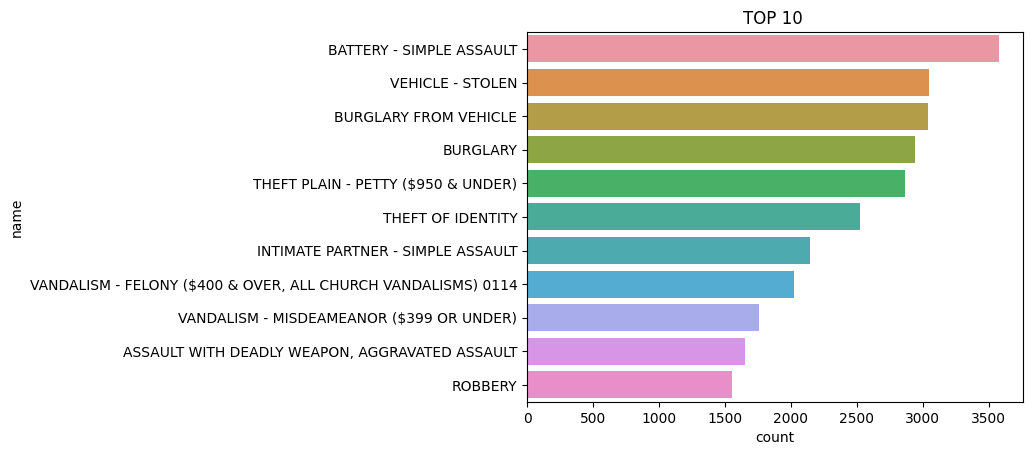

In [28]:
x = df["Crime Code Description"].value_counts()[:11]
y = df["Crime Code Description"].value_counts()[:11].index
h = sb.barplot(x=x, y=y)
h.set_title('TOP 10 ')
h.set_xlabel('count')
h.set_ylabel('name')

8. От каких преступлений чаще страдают женщины, а от каких мужчины?

In [29]:
df1 = df.groupby(["Victim Sex"])["Crime Code Description"]
df1 = df1.value_counts()
df1 = df1.unstack()
df1 = df1.T
print(f"мужчины чаще всего страдаю от -> {df1['M'].idxmax()}")
print(f"мужчины чаще всего страдаю от -> {df1['F'].idxmax()}")
print(df1.idxmax())


мужчины чаще всего страдаю от -> BATTERY - SIMPLE ASSAULT
мужчины чаще всего страдаю от -> BATTERY - SIMPLE ASSAULT
Victim Sex
F                    BATTERY - SIMPLE ASSAULT
H                    BATTERY - SIMPLE ASSAULT
M                    BATTERY - SIMPLE ASSAULT
X    SHOPLIFTING - PETTY THEFT ($950 & UNDER)
dtype: object


9. Люди какого происхождения чаще всего подвергаются преступлениям?

In [30]:
df["Victim Descent"].value_counts().idxmax()

'H'

10. Отсортируйте районы, по количеству преступлений. Постройте график,
показывающий самые безопасный и опасный районы

Text(0, 0.5, 'name')

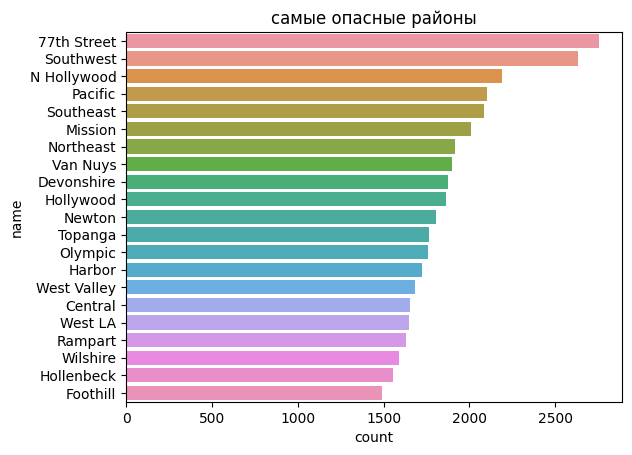

In [31]:
x = df["Area Name"].value_counts()
y = df["Area Name"].value_counts().index

h = sb.barplot(x=x, y=y)
h.set_title('самые опасные районы')
h.set_xlabel('count')
h.set_ylabel('name')

№4 (4 балла)
В файле polit.csv (https://cloud.mail.ru/public/P5P7/qjm2F8CuN) хранятся некоторые данные,
используемые в исследовании James W.McGuire, “Authoritarianism in the Middle East”.

Показатели:
ctry – страна;

fh09 – индекс Freedom House за 2009 год (от 1 до 7, большие значения соответствуют
меньшему уровню гражданских свобод);

polity09 – индекс Polity2 за 2009 год (от -10 до 10, большие значения соответствуют
большему уровню демократии);

gini – индекс Джини за 2000-2010 годы (индекс имущественного неравенства);

fparl08 – доля женщин в парламенте в 2008 году (в процентах);

mena – регион Middle East and North Africa (1 – да, 0 – нет);

lati – регион Latin America;

cari – регион Caribbean, former British, French, Dutch colony;

east – регион East Asia;

sovi – регион Former Soviet Bloc;

afri – регион Africa;

corr0509 – индекс Control of Corruption, среднее за 2005-2009 годы.



Выполните следующие задания:
1. Загрузите датафрейм из файла polit.csv и сохраните его в переменную polit. Если в
датафрейме есть строки с пропущенными значениями, то удалите их.

In [32]:
polit = pd.read_csv("polit.csv").dropna()
polit

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142


2. Выберите в датафрейме строки, которые соответствуют странам со значениями
индекса Freedom House (fh09) выше 5.

In [33]:
polit[polit["fh09"]>5]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684
12,12,Azerbaijan,5.5,-7.0,16.8,11.38,0,0,0,0,0,0,-1.026767
17,17,Belarus,6.5,-7.0,28.8,32.53,0,0,0,0,0,0,-0.765586
31,31,Cambodia,5.5,2.0,44.2,15.76,0,0,0,1,0,0,-1.151233
32,32,Cameroon,6.0,-4.0,44.6,13.89,0,0,0,0,0,1,-1.000362
37,37,Chad,6.5,-2.0,39.8,5.16,0,0,0,0,0,1,-1.346880
40,40,China,6.5,-7.0,41.5,21.33,0,0,0,1,0,0,-0.568752
43,43,"Congo, Dem. Rep.",6.0,5.0,44.4,7.73,0,0,0,0,0,1,-1.428074
44,44,"Congo, Rep.",5.5,-4.0,47.3,9.18,0,0,0,0,0,1,-1.113118


3. Выберите в датафрейме строки, которые соответствуют странам Африки (afri) с
процентом женщин в парламенте (fparl08) выше 30%.

In [34]:
polit[(polit["afri"] == 1) & (polit["fparl08"] > 30)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
30,30,Burundi,4.5,6.0,33.3,31.74,0,0,0,0,0,1,-1.095802
133,133,Mozambique,3.5,5.0,47.1,34.80,0,0,0,0,0,1,-0.524405
160,160,Rwanda,5.5,-3.0,46.7,50.94,0,0,0,0,0,1,-0.164223
174,174,South Africa,2.0,9.0,57.8,33.92,0,0,0,0,0,1,0.332960
187,187,Tanzania,3.5,-1.0,34.6,30.41,0,0,0,0,0,1,-0.439213
198,198,Uganda,4.5,-1.0,42.6,30.72,0,0,0,0,0,1,-0.819751


4. Выберите в датафрейме строки, которые соответствуют странам Африки или
Латинской Америки (afri и lati) со значением индекса Polity2 (polity09) больше или
равным 8.

In [35]:
polit[((polit["afri"] == 1) | (polit["lati"] == 1)) & (polit["polity09"] >= 8)]

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793
25,25,Botswana,2.5,8.0,61.0,11.11,0,0,0,0,0,1,0.947725
26,26,Brazil,2.0,8.0,55.0,9.43,0,1,0,0,0,0,-0.119536
39,39,Chile,1.0,10.0,52.0,12.66,0,1,0,0,0,0,1.370524
42,42,Comoros,3.5,9.0,64.3,3.03,0,0,0,0,0,1,-0.709136
45,45,Costa Rica,1.0,10.0,48.9,36.84,0,1,0,0,0,0,0.483973
54,54,Dominican Republic,2.0,8.0,48.4,17.14,0,1,0,0,0,0,-0.618924
57,57,El Salvador,2.5,8.0,46.9,16.67,0,1,0,0,0,0,-0.288100
71,71,Ghana,1.5,8.0,42.8,7.89,0,0,0,0,0,1,-0.031224
77,77,Guatemala,4.0,8.0,53.7,12.03,0,1,0,0,0,0,-0.681574


5. Добавьте в датафрейм polit столбец corr_round, в котором будут храниться
округленные до 2 знака после запятой значения индекса Control of Corruption
(corr0509).

In [36]:
polit["corr_round"] = round(polit["corr0509"],2)
polit

,Unnamed: 0,ctry,fh09,polity09,gini,fparl08,mena,lati,cari,east,sovi,afri,corr0509,corr_round
1,1,Albania,3.0,9.0,33.0,7.14,0,0,0,0,1,0,-0.580513,-0.58
2,2,Algeria,5.5,2.0,35.3,6.48,1,0,0,0,0,0,-0.434654,-0.43
5,5,Angola,5.5,-2.0,58.6,37.27,0,0,0,0,0,0,-1.292684,-1.29
7,7,Argentina,2.0,8.0,48.8,39.76,0,1,0,0,0,0,-0.420793,-0.42
8,8,Armenia,5.0,5.0,30.2,8.40,0,0,0,0,0,0,-0.578211,-0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,"Venezuela, RB",4.5,-3.0,43.4,18.56,0,1,0,0,0,0,-1.061680,-1.06
207,207,Vietnam,6.0,-7.0,37.8,25.76,0,0,0,1,0,0,-0.656128,-0.66
210,210,"Yemen, Rep.",5.5,-2.0,37.7,0.73,1,0,0,0,0,0,-0.808840,-0.81
211,211,Zambia,3.5,7.0,50.7,15.19,0,0,0,0,0,1,-0.601142,-0.60


6. Добавьте в датафрейм polit столбец fh_status, в котором будут храниться типы стран
в зависимости от значения индекса Freedom House (значения free, partly free, not free).
Соответствие значений fh09 с типами стран см. здесь
https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf (Table
3 на последней странице).

In [37]:
def table3(fh_index):
    if fh_index >= 1 and fh_index <= 2.5:
        return "Free"
    if fh_index >= 3.0 and fh_index <= 5.0:
        return "Partly Free"
    if fh_index >= 5.5 and fh_index <= 7.0:
        return "Not Free"

polit["fh_status"] = polit["fh09"].map(table3)

polit[["fh09", "fh_status"]]

,fh09,fh_status
1,3.0,Partly Free
2,5.5,Not Free
5,5.5,Not Free
7,2.0,Free
8,5.0,Partly Free
...,...,...
206,4.5,Partly Free
207,6.0,Not Free
210,5.5,Not Free
211,3.5,Partly Free


7. Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status,
полученного в предыдущей части и выведите минимальное, среднее и максимальное
значение показателя gini (индекс Джини) по каждой группе.

In [38]:
groups = polit.groupby(["fh_status"])
fh_statuses = polit["fh_status"].unique()

for status in fh_statuses:
    group = groups.get_group(status)
    min_gini = group["gini"].min()
    max_gini = group["gini"].max()
    avg_gini = group["gini"].mean()
    
    print("\nStatus:", status, "\nMin:", min_gini, "\nMax:", max_gini, "\nAvg:", avg_gini)


Status: Partly Free 
Min: 29.8 
Max: 64.3 
Avg: 43.93125

Status: Not Free 
Min: 16.8 
Max: 58.6 
Avg: 39.75

Status: Free 
Min: 24.7 
Max: 74.3 
Avg: 38.170175438596495


8. Сгруппируйте строки в таблице в соответствии со значениями столбца fh_status и
запишите строки, относящиеся к разным группам, в отдельные csv-файлы.

In [47]:
groups = polit.groupby(["fh_status"])
fh_statuses = polit["fh_status"].unique()

for status in fh_statuses:
    new_dataframe = groups.get_group(status)
    new_dataframe.to_csv(f"csv/{status}.csv")

№5 (4 балла)
Используя набор данных Video Game Sales https://www.kaggle.com/gregorut/videogamesales

In [48]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


1. Вывести все доступные платформы, на которых выпускалась хотя-бы одна игра;


In [51]:
(df["Platform"].unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

2. Добавить к копии набора данных столбец metacritic_rating и заполнить его данными
из набора данных Metacritic all time games stats
(https://www.kaggle.com/skateddu/metacritic-all-time-games-stats);


In [58]:
meta = pd.read_csv("metacritic_games.csv", usecols=["name", "platform", "rating"])
meta.rename(columns={"name": "Name", "platform": "Platform","rating": "Metacritic_rating"}, inplace=True)
df1 = df.copy()
df1 = df1.merge(meta)
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Metacritic_rating
0,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,E
1,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,E
2,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,E
3,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
4,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6171,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01,E
6172,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01,E
6173,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,E
6174,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,T


3. Вывести список игр, рейтинг которых равен "M" и год издания не ранее 2012 года;

In [63]:
df3 = df1[(df1["Metacritic_rating"] == "M") & (df1["Year"] >= 2012)]
df3

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Metacritic_rating
3,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,M
5,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,M
11,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,M
12,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,M
20,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6025,15766,Divinity: Original Sin,PC,2014.0,Role-Playing,Focus Home Interactive,0.00,0.02,0.00,0.00,0.02,M
6062,15926,Pillars of Eternity,PC,2014.0,Role-Playing,Paradox Interactive,0.00,0.01,0.00,0.00,0.02,M
6100,16178,Republique,PS4,2016.0,Action,Nippon Ichi Software,0.00,0.01,0.01,0.00,0.01,M
6131,16336,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01,M


4. Рассчитать и вывести описательные статистики для списка, полученного в
предыдущем пункте;


In [64]:
df3.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5635.425249,2013.252492,0.516013,0.469867,0.058140,0.158405,1.202425
std,4510.805299,1.247411,1.139091,0.954804,0.127187,0.367517,2.420555
min,17.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1950.000000,2012.000000,0.050000,0.050000,0.000000,0.010000,0.150000
50%,4545.000000,2013.000000,0.160000,0.150000,0.010000,0.050000,0.430000
75%,8838.000000,2014.000000,0.460000,0.440000,0.060000,0.140000,1.060000
max,16402.000000,2016.000000,9.630000,9.270000,0.970000,4.140000,21.400000


5. Вывести жанры игр с количеством игр, которые принадлежат соответствующему
жанру в виде "<жанр> - <количество игр>" для всех жанров, которые содержат в
своем названии не менее 3 различных гласных

In [66]:
genres = df["Genre"].unique()


def vowel_func(word):
    vowels = ["a", "e", "i", "u", "y", "o"]
    count = 0
    for symbol in word.lower():
        if symbol in vowels:
            vowels.remove(symbol)
            count += 1
        if count == 3:
            return True

    return False


genres = list(filter(vowel_func, genres))

for genre in genres:
    print(genre, " \t-", df["Genre"].value_counts()[genre])

Role-Playing  	- 1488
Simulation  	- 867
Action  	- 3316
Adventure  	- 1286
Strategy  	- 681


№6 (5 баллов)
На сайте http://aisori-m.meteo.ru/waisori/index0.xhtml можно получить информацию
метеорологических наблюдений по выбранному городу. Скачайте информацию о какомнибудь городе и выполните следующие задания. Пример того как выглядят данные для
города Барнаул: https://cloud.mail.ru/public/kHoj/oHpFCipkg.

1. Загрузите данные из файла в объект DataFrame, Добавьте заголовки к столбцам:
«index», «year», «month», «day», «min_t», «average_t», «max_t», «rainfall».
Расшифровка:

• index – индекс ВМО,

• year – год,

• month – месяц,

• day – день,

• min_t – минимальная температура воздуха,

• average_t – средняя температура воздуха,

• max_t – максимальная температура воздуха,

• rainfall – количество осадков.


In [73]:
df=pd.read_table("lab3.txt",header = None,sep=";")
df.columns=["index","year","month","day","min_t","average_t","max_t","rainfall"]
df

,index,year,month,day,min_t,average_t,max_t,rainfall
0,29838,1960,1,1,-6.9,-5.4,-3.8,0.1
1,29838,1960,1,2,-14.4,-10.0,-6.7,0.5
2,29838,1960,1,3,-21.7,-19.7,-13.4,0.0
3,29838,1960,1,4,-24.9,-21.4,-16.9,0.0
4,29838,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...,...
22276,29838,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,29838,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,29838,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,29838,2020,12,30,-21.8,-13.6,-9.9,0.8


2. Удалите столбец index.


In [74]:
del df["index"]
df

,year,month,day,min_t,average_t,max_t,rainfall
0,1960,1,1,-6.9,-5.4,-3.8,0.1
1,1960,1,2,-14.4,-10.0,-6.7,0.5
2,1960,1,3,-21.7,-19.7,-13.4,0.0
3,1960,1,4,-24.9,-21.4,-16.9,0.0
4,1960,1,5,-18.3,-8.0,-3.3,4.1
...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0
22277,2020,12,28,-40.1,-34.2,-25.5,0.0
22278,2020,12,29,-28.2,-23.9,-18.6,0.0
22279,2020,12,30,-21.8,-13.6,-9.9,0.8


3. Используя метод info(), oтветьте на вопросы:

 Есть ли в данных пропущенные значения?

 В каком столбце данных больше всего пропущенных значений?



In [75]:
t=["min_t","average_t","max_t","rainfall"]
for i in t:
    df[i]=df[i].str.replace(" ","")
    df[i]=pd.to_numeric(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22281 entries, 0 to 22280
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       22281 non-null  int64  
 1   month      22281 non-null  int64  
 2   day        22281 non-null  int64  
 3   min_t      22255 non-null  float64
 4   average_t  22255 non-null  float64
 5   max_t      21717 non-null  float64
 6   rainfall   22253 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [79]:
print(df.applymap(pd.isnull))

        year  month    day  min_t  average_t  max_t  rainfall
0      False  False  False  False      False  False     False
1      False  False  False  False      False  False     False
2      False  False  False  False      False  False     False
3      False  False  False  False      False  False     False
4      False  False  False  False      False  False     False
...      ...    ...    ...    ...        ...    ...       ...
22276  False  False  False  False      False  False     False
22277  False  False  False  False      False  False     False
22278  False  False  False  False      False  False     False
22279  False  False  False  False      False  False     False
22280  False  False  False  False      False  False     False

[22281 rows x 7 columns]


In [83]:
print(df.isnull().sum())
print(df.isnull().sum().max())
df.count().idxmin()

year           0
month          0
day            0
min_t         26
average_t     26
max_t        564
rainfall      28
dtype: int64
564


'max_t'

4. В данных за какой год больше всего пропусков?


In [84]:
n={}
for y in df['year'].unique():
    n[y]=df[df['year']==y].isna().sum().sum()
print(f'{max(n,key=n.get)} год ,{n[max(n,key=n.get)]} пропусков')

1961 год ,334 пропусков


5. Объедините столбцы «Год», «Месяц» и «День» в один столбец «Дата» в формате
гггг-мм-дд (2000-01-20). Данные в новом столбце должны иметь формат datetime;

In [85]:
df['data']=pd.to_datetime(df['day'].astype(str)+'-'+df['month'].astype(str)+'-'+df['year'].astype(str),format='%d-%m-%Y')

df

,year,month,day,min_t,average_t,max_t,rainfall,data
0,1960,1,1,-6.9,-5.4,-3.8,0.1,1960-01-01
1,1960,1,2,-14.4,-10.0,-6.7,0.5,1960-01-02
2,1960,1,3,-21.7,-19.7,-13.4,0.0,1960-01-03
3,1960,1,4,-24.9,-21.4,-16.9,0.0,1960-01-04
4,1960,1,5,-18.3,-8.0,-3.3,4.1,1960-01-05
...,...,...,...,...,...,...,...,...
22276,2020,12,27,-41.7,-36.3,-32.8,0.0,2020-12-27
22277,2020,12,28,-40.1,-34.2,-25.5,0.0,2020-12-28
22278,2020,12,29,-28.2,-23.9,-18.6,0.0,2020-12-29
22279,2020,12,30,-21.8,-13.6,-9.9,0.8,2020-12-30


6. Для каждого наблюдения рассчитайте размах температур (разность максимальной и
минимальной суточных температур) и количество предшествующих ему дней без
осадков (используйте циклы Python и условный оператор).

In [86]:
df['temp range'] = abs(df['min_t'] - df['max_t'])
count = 0
maxcount = 0
df['no rain'] = df['rainfall']
for idx, d in enumerate(df['no rain']):
    df['no rain'][idx] = count
    if d == 0:
        count += 1
    else:
        count = 0
    if maxcount < count:
        maxcount = count
print(df)

C:\Users\iskan\AppData\Local\Temp\ipykernel_20344\2505710210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no rain'][idx] = count


       year  month  day  min_t  average_t  max_t  rainfall       data  \
0      1960      1    1   -6.9       -5.4   -3.8       0.1 1960-01-01   
1      1960      1    2  -14.4      -10.0   -6.7       0.5 1960-01-02   
2      1960      1    3  -21.7      -19.7  -13.4       0.0 1960-01-03   
3      1960      1    4  -24.9      -21.4  -16.9       0.0 1960-01-04   
4      1960      1    5  -18.3       -8.0   -3.3       4.1 1960-01-05   
...     ...    ...  ...    ...        ...    ...       ...        ...   
22276  2020     12   27  -41.7      -36.3  -32.8       0.0 2020-12-27   
22277  2020     12   28  -40.1      -34.2  -25.5       0.0 2020-12-28   
22278  2020     12   29  -28.2      -23.9  -18.6       0.0 2020-12-29   
22279  2020     12   30  -21.8      -13.6   -9.9       0.8 2020-12-30   
22280  2020     12   31  -23.2      -19.0  -10.0       1.4 2020-12-31   

       temp range  no rain  
0             3.1      0.0  
1             7.7      0.0  
2             8.3      0.0  
3      

7. Определите самый длинный период засухи.

In [87]:
maxcount

27

8. Для каждого года вычислите среднегодовую температуру и общее количество
осадков. Запишите результаты в объекты Series.

 Какой год можно считать самым теплым? Какой самым холодным?

 В какой год выпало больше всего осадков? В какой меньше всего?



In [88]:
avg_temp = df.groupby(['year'])['average_t'].mean()
cum_rain = df.groupby(['year'])['rainfall'].sum()
print(avg_temp, cum_rain)

year
1960   -0.113934
1961    2.424384
1962    3.326849
1963    3.461264
1964    2.291803
          ...   
2016    3.021858
2017    3.512329
2018    1.607397
2019    3.413973
2020    4.776503
Name: average_t, Length: 61, dtype: float64 year
1960    472.7
1961    517.8
1962    368.7
1963    430.3
1964    425.3
        ...  
2016    488.8
2017    498.2
2018    442.4
2019    375.4
2020    437.2
Name: rainfall, Length: 61, dtype: float64


In [89]:
print(f"самый теплый год: {avg_temp.idxmax()}")
print(f"самый холодный год: {avg_temp.idxmin()}")

самый теплый год: 2020
самый холодный год: 1969


9. Выведете наблюдения, удовлетворяющие условиям:

 Средняя температура воздуха ниже -30 (для некоторых регионов можно
использовать -10, -35 или -40).

 Средняя температура воздуха выше 27 и количество дней без осадков больше
3.

In [90]:
print(df[df['average_t'] < -30])
print(df[(df['average_t'] > 27) & (df["no rain"] > 3)])

       year  month  day  min_t  average_t  max_t  rainfall       data  \
17     1960      1   18  -31.4      -31.2  -27.2       0.0 1960-01-18   
18     1960      1   19  -35.8      -33.2  -29.7       0.0 1960-01-19   
323    1960     11   19  -31.3      -30.1    NaN       0.8 1960-11-19   
361    1960     12   27  -34.2      -30.2    NaN       0.0 1960-12-27   
373    1961      1    8  -36.2      -34.5    NaN       0.0 1961-01-08   
...     ...    ...  ...    ...        ...    ...       ...        ...   
21585  2019      2    5  -38.0      -32.0  -24.3       0.0 2019-02-05   
21588  2019      2    8  -38.3      -32.8  -24.8       0.0 2019-02-08   
22275  2020     12   26  -35.5      -31.6  -23.4       0.0 2020-12-26   
22276  2020     12   27  -41.7      -36.3  -32.8       0.0 2020-12-27   
22277  2020     12   28  -40.1      -34.2  -25.5       0.0 2020-12-28   

       temp range  no rain  
17            4.2      1.0  
18            6.1      2.0  
323           NaN      0.0  
361    